In [35]:
import numpy as np
import json
import pandas as pd
import folium
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import proplot as plot
from glob import glob

In [8]:
with open('./avail_stations/info_estaciones_climavail.json') as loc_file:
    locations = json.load(loc_file)
loc_pd = pd.DataFrame.from_dict(locations)

In [9]:
def convert_coordstr(nsinfo):
    latstr = nsinfo['latitud'].values.item()
    lat = np.int(latstr[:2])+np.int(latstr[2:4])/60.+np.int(latstr[4:6])/3600.
    if latstr[-1]=='S':
        lat =-lat

    lonstr = nsinfo['longitud'].values.item()
    lon = np.int(lonstr[:2])+np.int(lonstr[2:4])/60.+np.int(lonstr[4:6])/3600.
    if lonstr[-1]=='W':
        lon =-lon

    return lat,lon
    

In [18]:
mapa = folium.Map(width=1000, height=1000, zoom_start=6,
                  location=[37, 0-7],tiles='cartodbpositron')
for stn_id in loc_pd.indicativo:
    
    nsinfo = loc_pd[loc_pd.indicativo==stn_id]
    
    
    lat,lon = convert_coordstr(nsinfo)
    
    folium.CircleMarker(
    location=[lat,lon],
    #popup=folium.Popup(f'<a href="http://eady.uib.es/dargueso/{url[nloc]}/"target="_blank">{names[nloc]}</a>'),
    #popup = folium.Popup(max_width=daychart.width[0]).add_child(daychart),
    popup=folium.Popup(f'{stn_id}\n {nsinfo.nombre.item()}'),
    radius=5,
    color='gray',
    fill=True,
    fill_color='gray').add_to(mapa)
    
mapa
mapa.save('map_loc.html')

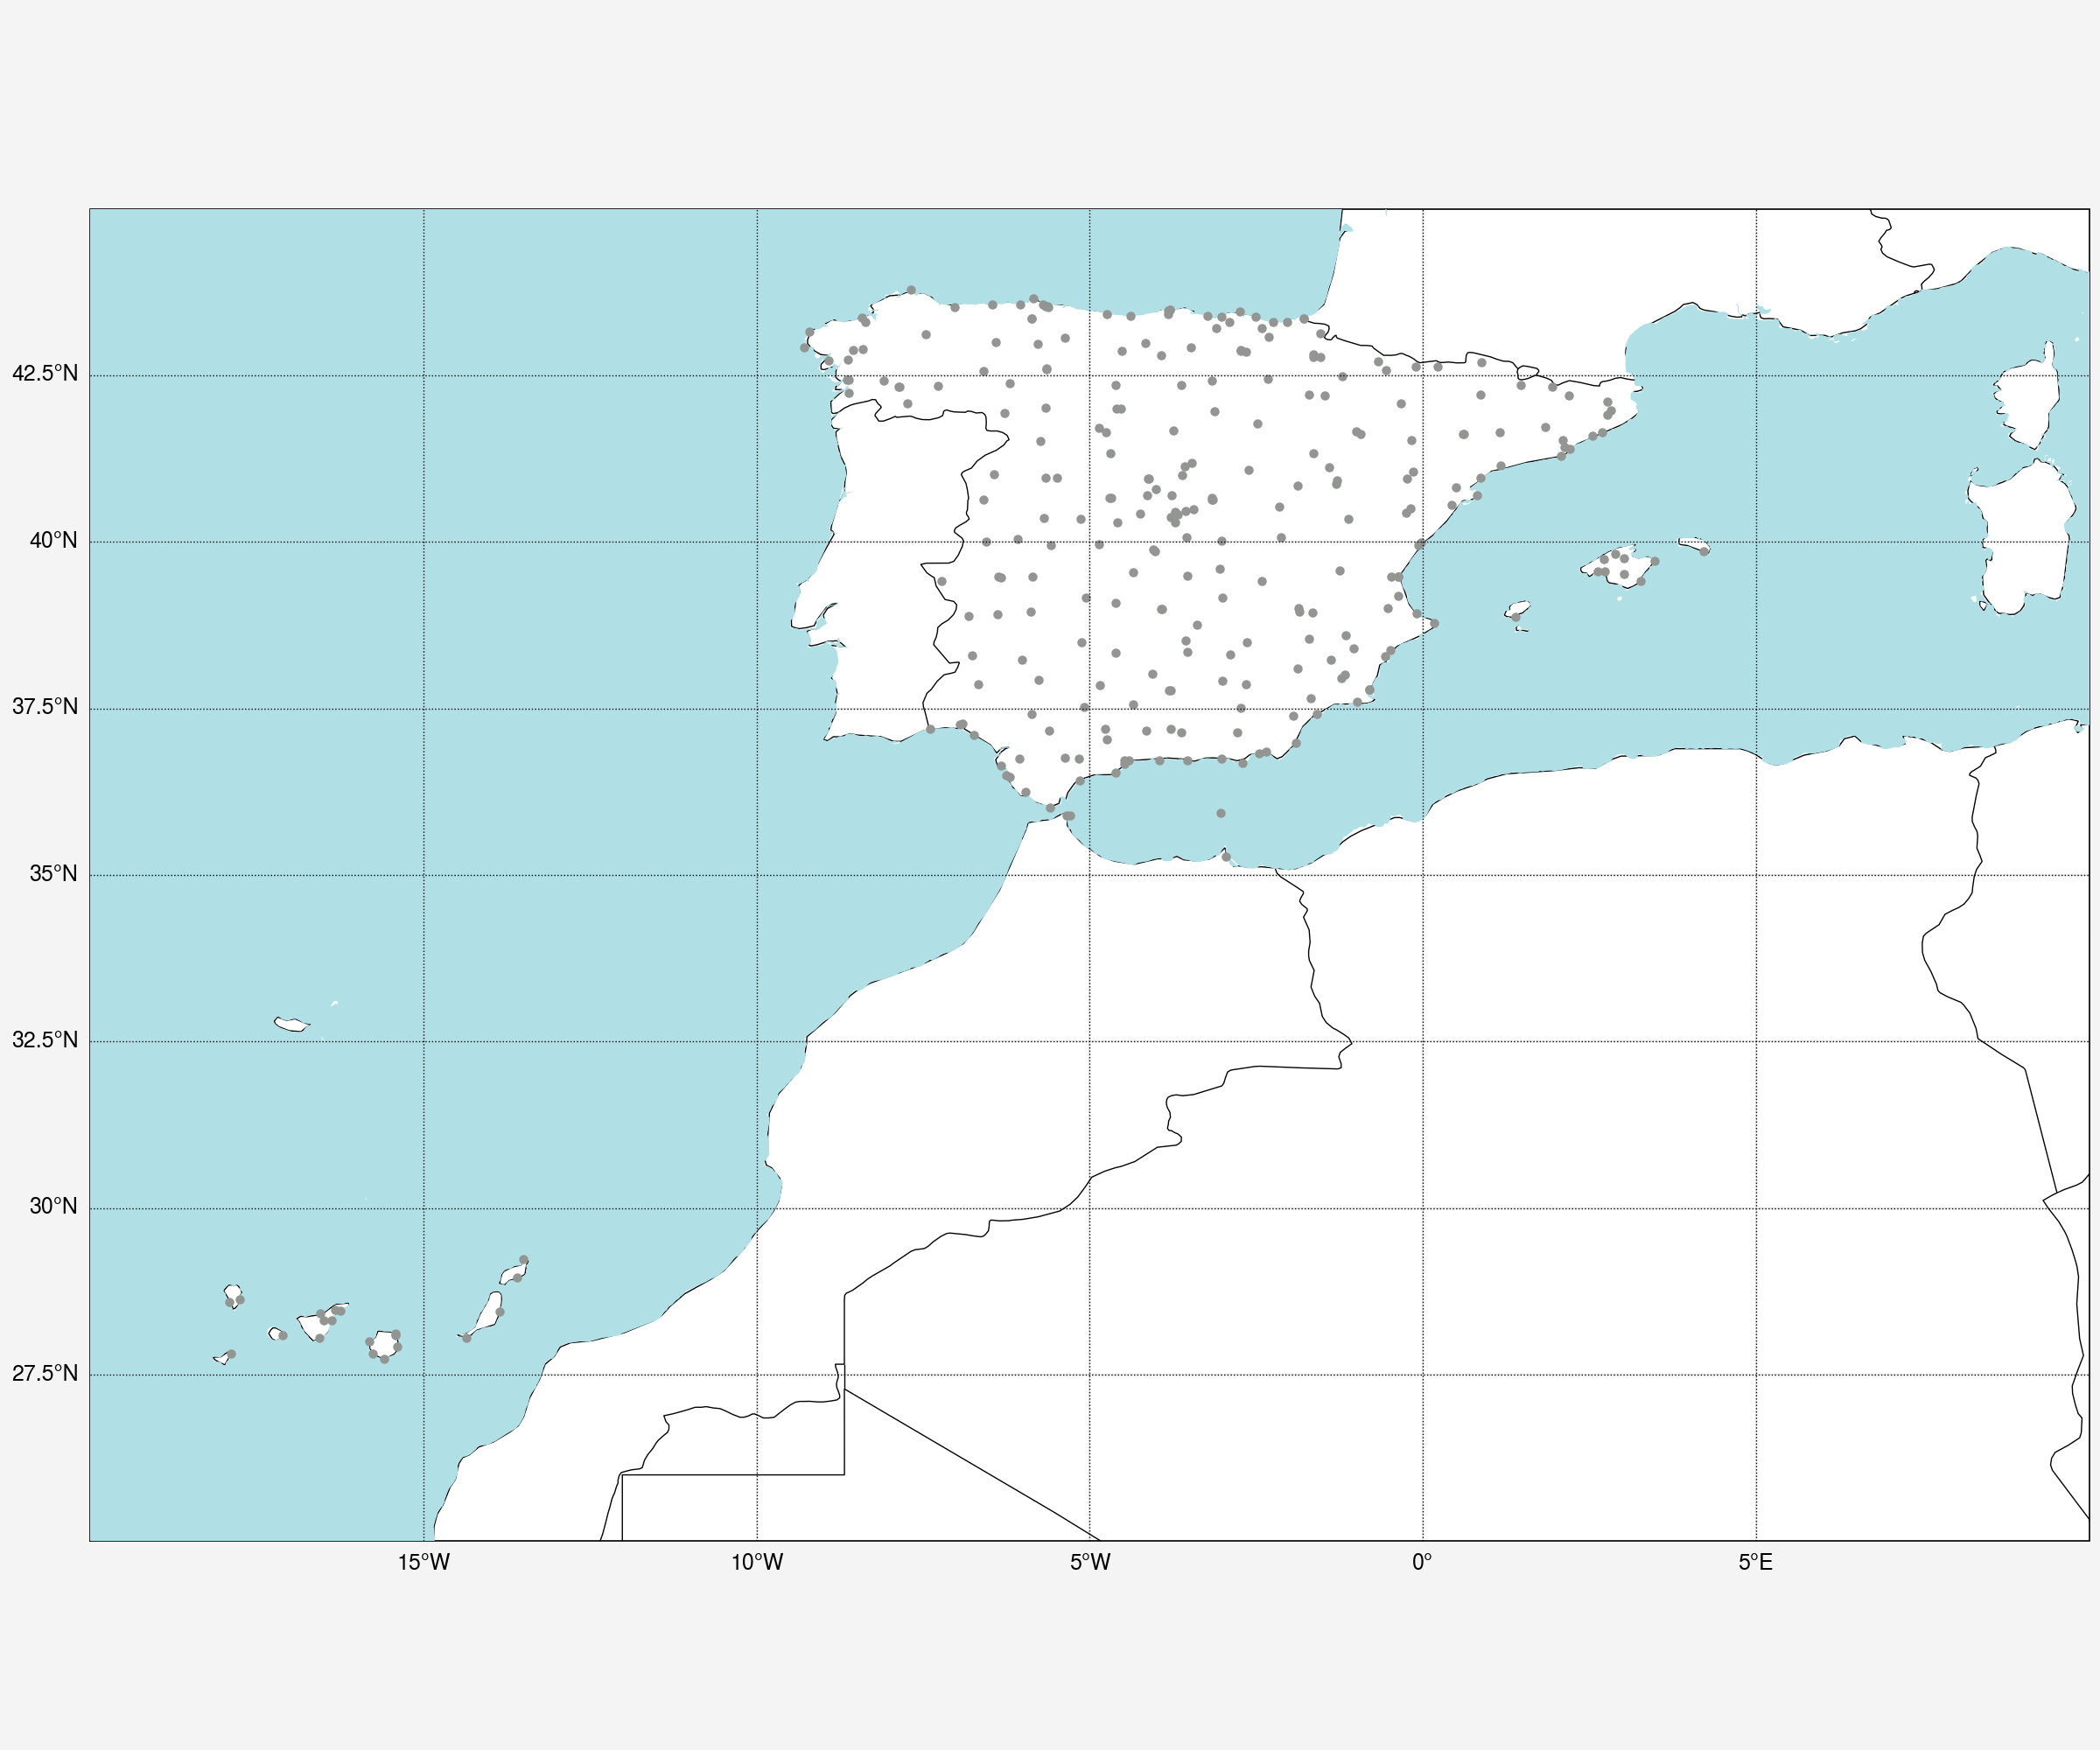

In [33]:
#Plotting
# Create a figure
fig, axs = plot.subplots(width=12,height=10,ncols=1,nrows=1,proj=ccrs.PlateCarree())
axs.format(
        suptitle="",
        suptitlesize='xx-large',
        abc=False,
    )

axs[0].add_feature(cfeature.COASTLINE,linewidth=0.5)
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5)

oce50m = cfeature.NaturalEarthFeature('physical', 'ocean', '10m')
lakes50m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m')
land50m = cfeature.NaturalEarthFeature('physical', 'land', '10m')
axs[0].add_feature(oce50m , zorder=100,facecolor='powderblue')
#axs[0].add_feature(lakes50m, zorder=100,linewidth=0.5,edgecolor='k',facecolor=[197/255,  230/255,  219/255])
#axs[0].add_feature(land50m, zorder=100,edgecolor='k',facecolor='lightgray')


for stn_id in loc_pd.indicativo:
    
    nsinfo = loc_pd[loc_pd.indicativo==stn_id]
    
    
    lat,lon = convert_coordstr(nsinfo)
    axs[0].scatter(x=lon, y=lat,
                s=10,c='gray',
                transform=ccrs.PlateCarree(),zorder=101) ## Important


cmap = plot.Colormap('IceFire')

cmap_kw = {'left': 0}
# m0=axs[0].contourf(to_np(lons), to_np(lats), hgt.where(lm_is>0),
#                  transform=ccrs.PlateCarree(),cmap=cmap,
#                  cmap_kw=cmap_kw,levels = range(0,3200,200),extend='both',colorbar='b')

axs[0].set_extent([-20,10,25,45])
gl0=axs[0].gridlines(color="black", linestyle="dotted",linewidth=0.5,draw_labels=True,x_inline=False, y_inline=False,zorder=101)
gl0.right_labels=False
gl0.top_labels=False    



In [42]:
all_files = sorted(glob(f'./Data_records/córdoba_aeropuerto/Data_ClimDay_córdoba_aeropuerto_196*.csv'))
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, sep=',')
    li.append(df)
clim_data = pd.concat(li, axis=0, ignore_index=True,sort=False)

clim_data = clim_data.set_index('fecha')
clim_data = clim_data.rename_axis('datetime')
clim_data.index = pd.to_datetime(clim_data.index.get_level_values(0).astype(str),format='%Y-%m-%d')

In [48]:
clim_data.tmax.max()


TypeError: '>=' not supported between instances of 'str' and 'float'